## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [183]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
vehicle_df = pd.read_csv("vehicle-2.csv")

In [192]:
vehicle_df.shape

(846, 19)

In [193]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


#### The Output variable "Class" is a categorical One. So lets use Label encoder to give it a numberical representation

In [194]:
class_le = LabelEncoder() 
columns = vehicle_df.columns
vehicle_df['class'] = class_le.fit_transform(vehicle_df['class'])

#### Lets check the number of different types of class variable

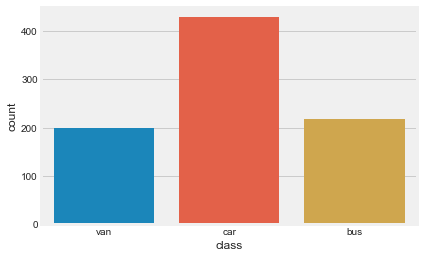

In [195]:
sns.countplot(new_vehicle_df['class'])
plt.show()

#### There are 3 main categories. As can be seen from looking at vehicle_df.head() above, these are van, car and bus

In [196]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### All attributes are numerical type.  Certain features have missing values. Except features like "compactness, class, hollow_ratio,max.length_rectangularity, max.length_aspect_ratio, rest all have missing values "

In [197]:
print("Original null value count:", vehicle_df.isnull().sum())


Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


### Impute the missing values using Median Strategy. Create a new dataframe using transformed values

In [199]:
new_vehicle_df = vehicle_df.copy()
X = new_vehicle_df.iloc[:,0:19] #separating all numerical independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with median column values
transformed_values = imputer.fit_transform(X)
column = X.columns
new_vehicle_df = pd.DataFrame(transformed_values, columns = column )
new_vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388,0.977541
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [200]:
print("\n\nCount after we imputed the NaN value: ", new_vehicle_df.isnull().sum())



Count after we imputed the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [203]:
# Check for duplicate data

dups = new_vehicle_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

new_vehicle_df[dups]

Number of duplicate rows = 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


### Check for skewness in data. Also check for Outliers. Use Visualization to see skewness, outliers

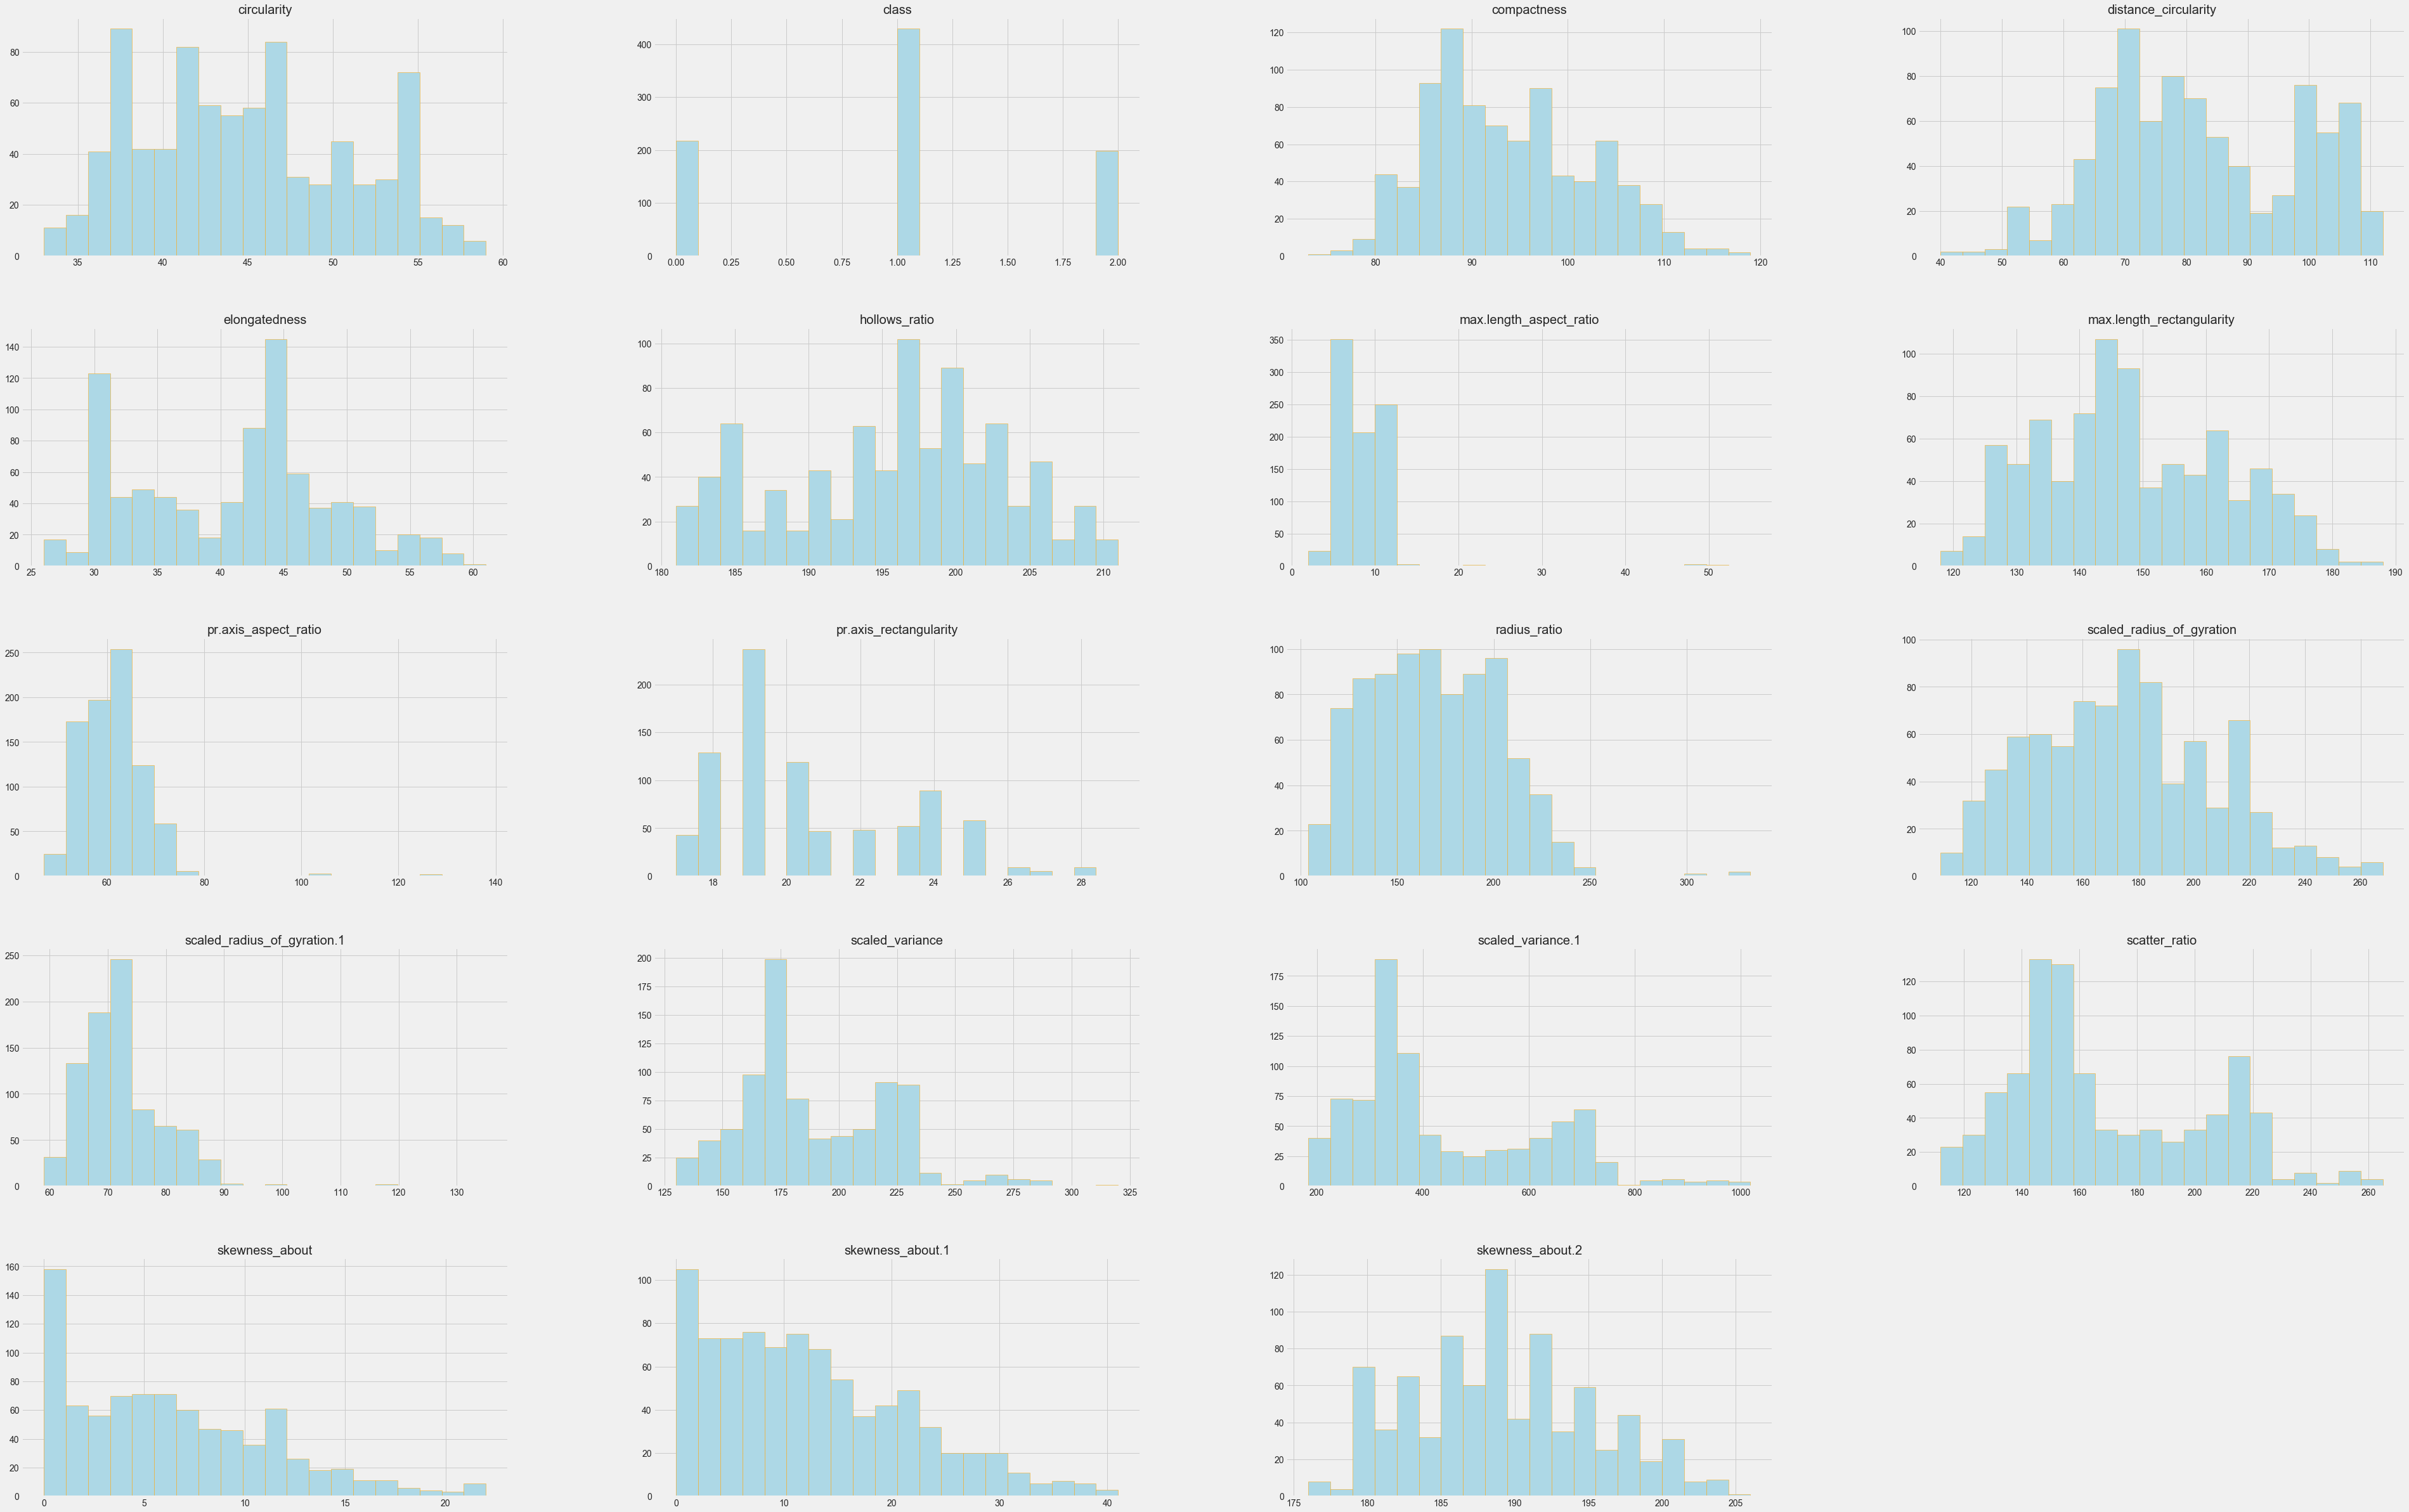

In [204]:
plt.style.use('fivethirtyeight')
new_vehicle_df.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'orange')
plt.show()

### Data is mostly normally distributed . Some attributes are right skewed. Lets find in absolute terms the skewness
### We see that scaled_variance.1, skewness_about, skewness_about.1, pr.axis attributes are skewed

In [205]:
skewValue = new_vehicle_df.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


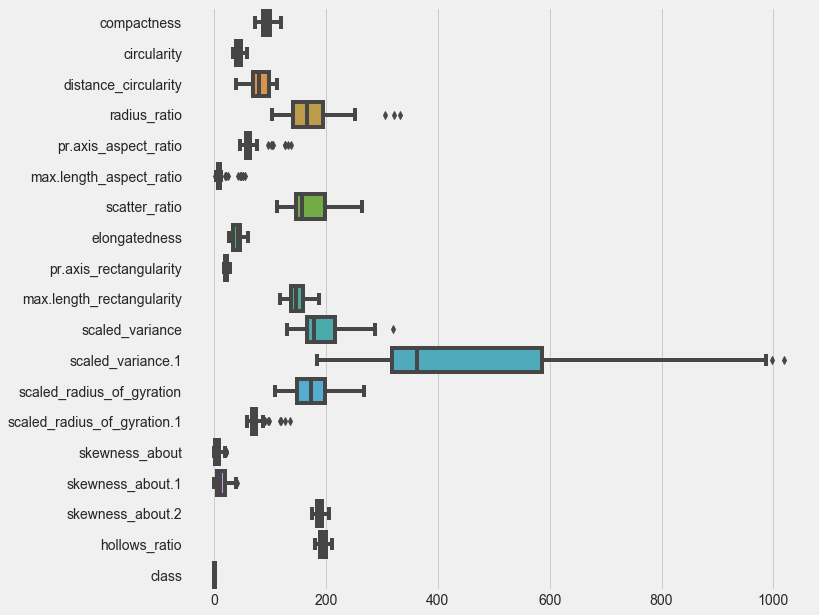

In [206]:
#Lets check to see if the data have outliers
plt.figure(figsize= (10,10))
ax = sns.boxplot(data=new_vehicle_df, orient="horizontal")

In [207]:
### Lets see which attributes have outliers
from scipy.stats import iqr
Qtr1 = new_vehicle_df.quantile(0.25)
Qtr3 = new_vehicle_df.quantile(0.75)
IQR = Qtr3 - Qtr1
print(IQR)


compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [212]:
clean_df = new_vehicle_df[~((new_vehicle_df < (Q1 - 1.5 * IQR)) |(new_vehicle_df > (Q3 + 1.5 * IQR))).any(axis=1)]

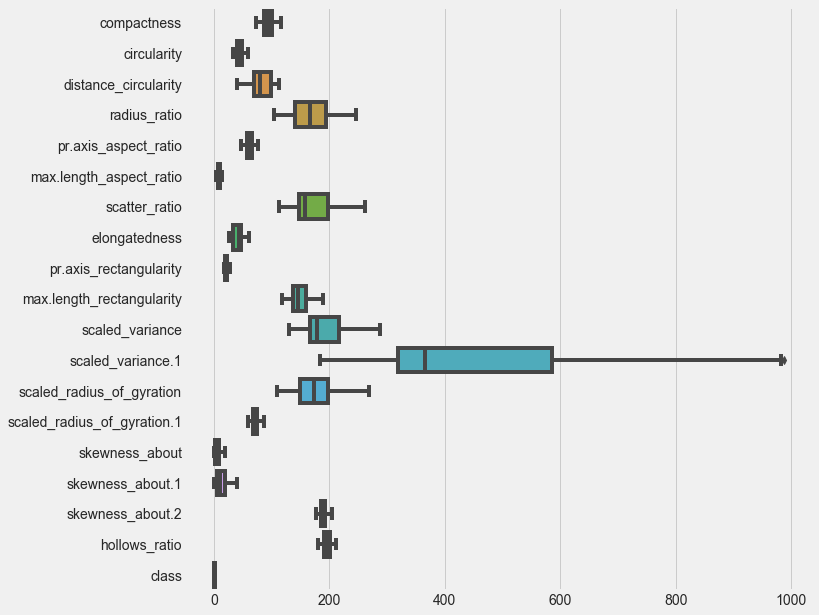

In [213]:
#Lets check to see if the data have outliers
plt.figure(figsize= (10,10))
ax = sns.boxplot(data=clean_df, orient="horizontal")

#### As we can see above, all outliers have been cleaned

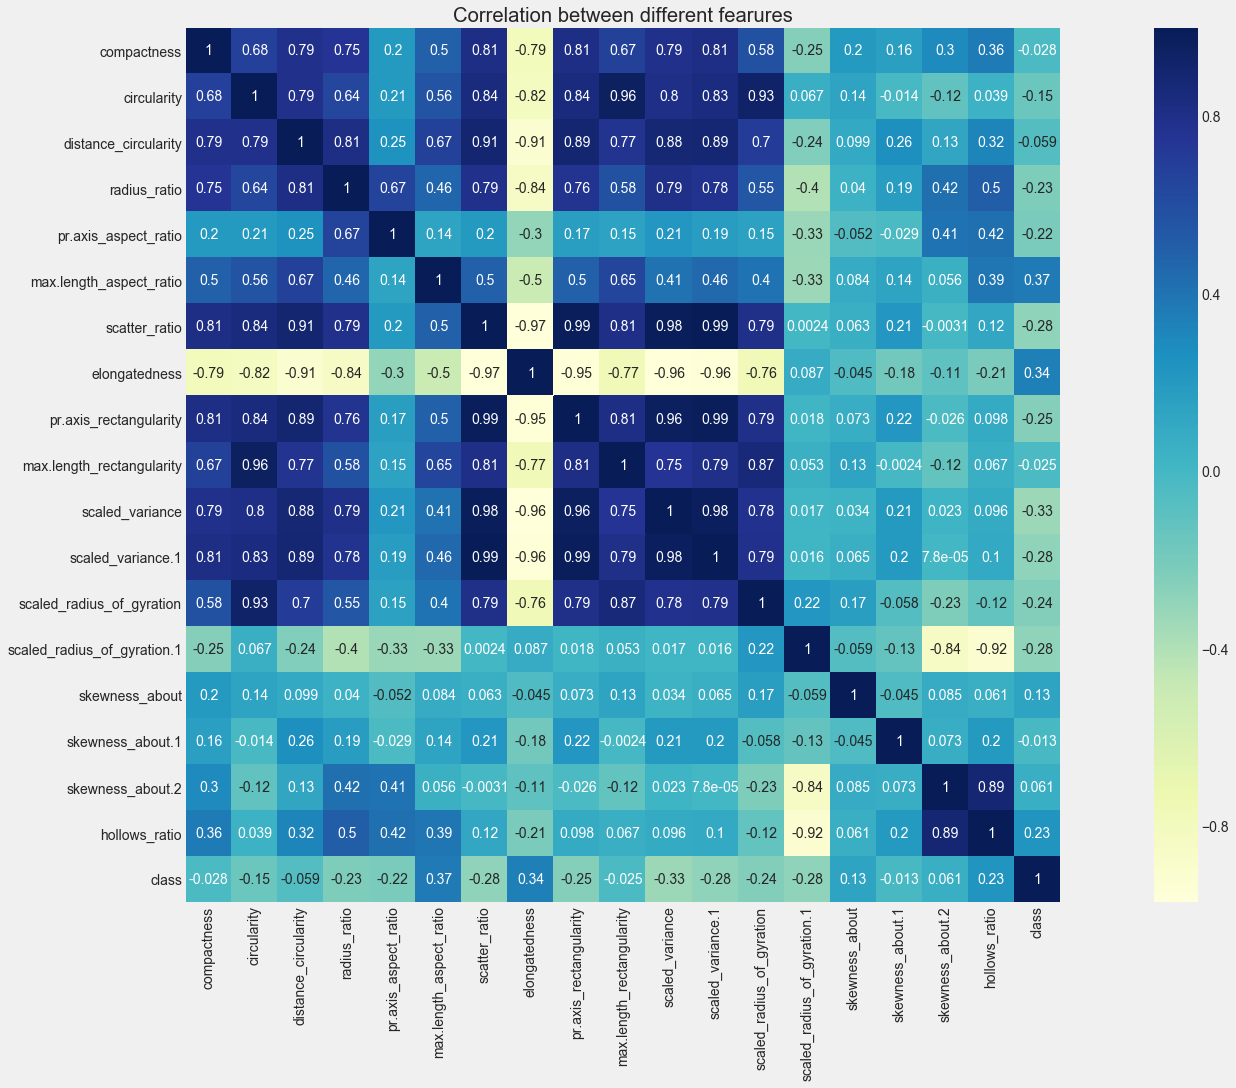

In [214]:
clean_df= new_vehicle_df.drop('class', axis=1)
correlation = cleandf.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu')
plt.title('Correlation between different fearures')
plt.show();

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

## Some Observations on Features with strong co-relation

In [215]:
# a) Circularity is Strongly co-related to max.length_rectangularity and scaled_radius_of_gyration
# b) distance_circularity is Stronglt co-related to scatter_ration and pr_axis_aspect_ratio and scaled_variance and scaled_variance1
# c) It also is negatively co-related to elongatedness
# d) In Fact elongatedness is neatively co-related to several parameters like compactness, circulariy, radius ratio, distance_circularity, scater ratio, pr.axis_rectangularity, scaled_variance etc.
# e) Scaled variance and Scaled Variance.1 is strongly co-related
# f) Scatter ratio and pr.axis_aspect_ratio, scaled_variance, scaled_variance1 is also co-related to several parameters like compactness, circularity, distance_circularity, radius_ratio, scaled_radius_of_gyration 
# g) skewness_about2, hollow_ratio have strong negative co-relation with scaled_radius_of_gyration.1

## Some Observations on Features with weak co-relation

In [216]:
# a) max_length_aspect_ratio is having average or low co-relation with most of the parameters except distance_circularity
# b) pr.axis_aspect_ratio seems to have very little correlation with most of the parameters
# c) scaled_radius_gyration.1 seems to be very little correlated with most of the parameters
# d) skewness_about & skewness_about.1 and skewness_about.2 have very little co-relation with most of parameters except perhaps hollows_ratio

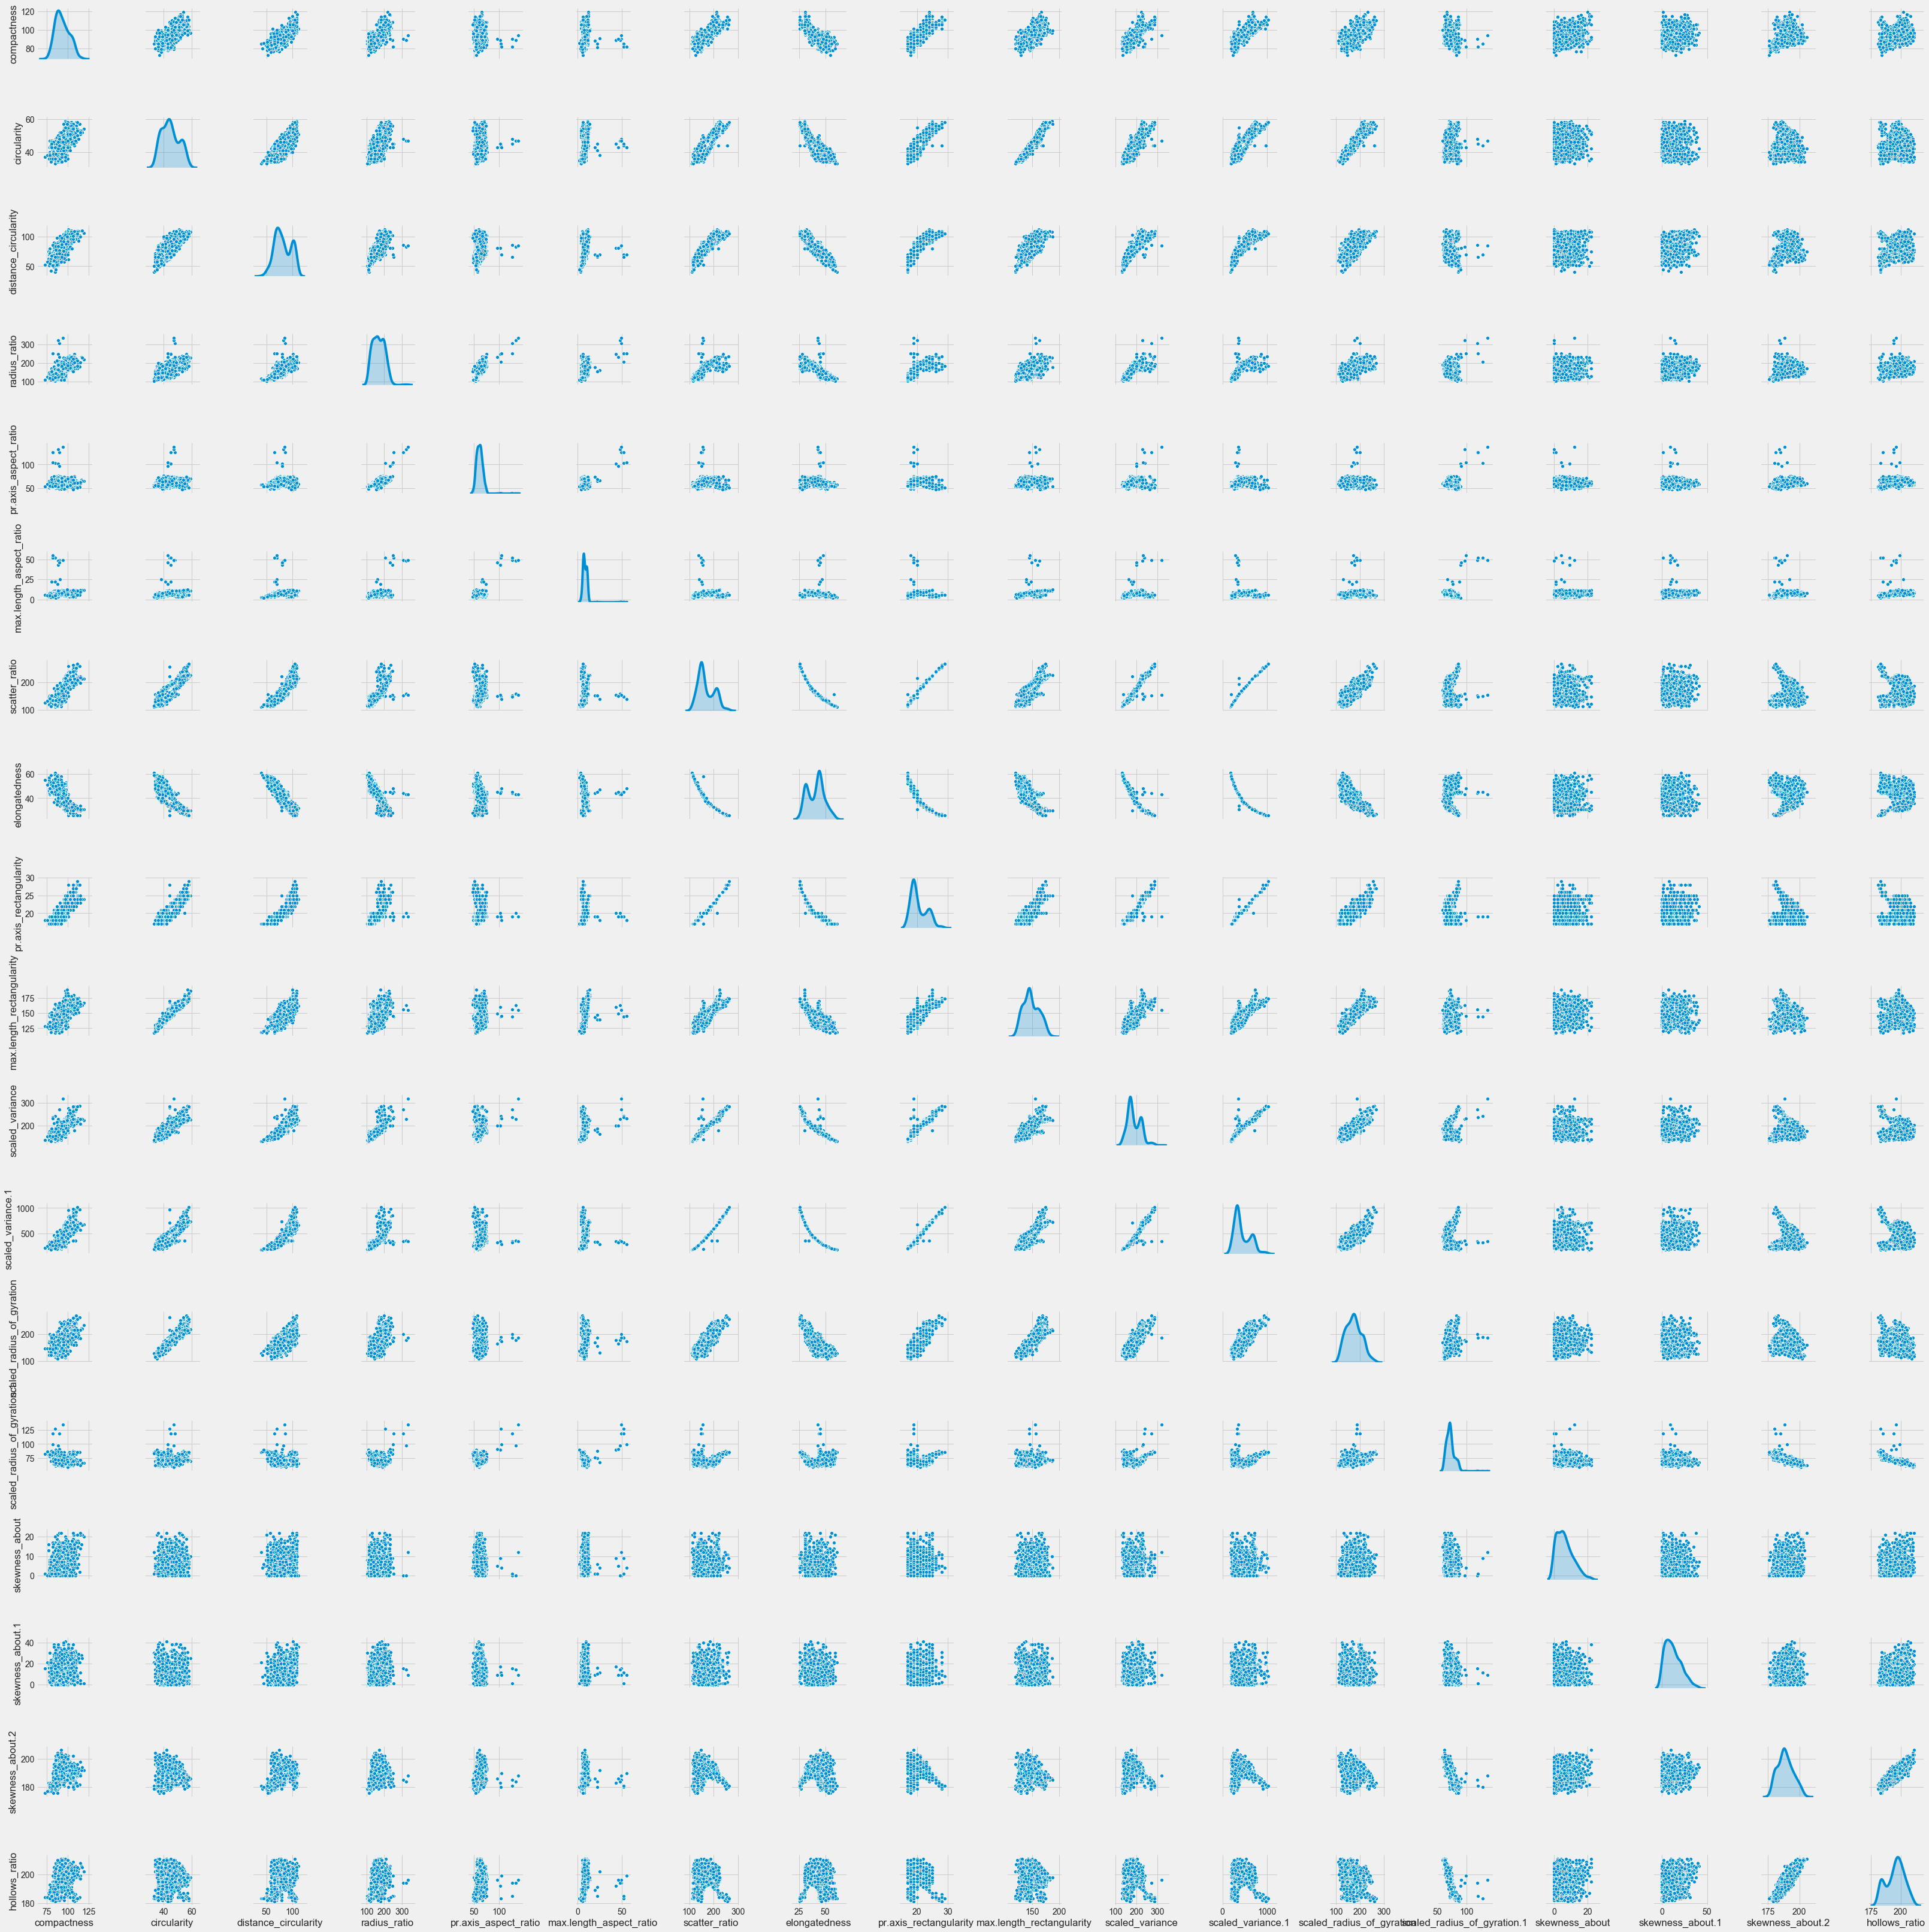

In [217]:
sns.pairplot(clean_df, diag_kind="kde")

In [ ]:
## The above pairplot also shows visually the different parameters that have strong and weak co-relations as stated in above observations
## Scaled Variance & Scaled Variance.1 are strongly co-related, so one of them can be dropped 

## As Dataset have several Variables that are highly co-related, they are perfect candidates for PCA and dimesionalaity reduction

## Note that keeping parameters in machine learning models with strong co-relations can lead to issule of Multicolinearity leading to misleading results. So,we can drop parameters that have co-relation of greater than 0.9 both positively or negatively

##There are 8 such columns:
### 1) max.length_rectangularity
### 2) scaled_radius_of_gyration
### 3) skewness_about.2
### 4) scatter_ratio
### 5) elongatedness
### 6) pr.axis_rectangularity
### 7) scaled_variance
### 8) scaled_variance.1

In [220]:
X = new_vehicle_df.iloc[:,0:18].values
y = new_vehicle_df.iloc[:,18].values

In [ ]:
### We will do PCA according to the following set
### 1) Split our data into train and test data set
### 2) Normalize the training set using standard scalar
### 3) Calculate the covariance matrix.
### 4) Calculate the eigenvectors and their eigenvalues.
### 5) Sort the eigenvectors according to their eigenvalues in descending order.
### 6) Choose the first K eigenvectors (where k is the dimension we’d like to end up with).
### 7) Build new dataset with reduced dimensionality.

In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [147]:
### Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function

In [222]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)


Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [223]:
# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.404602609088707, 3.014922058524637, 1.903525021838969, 1.1799374684450192, 0.9172606328594369, 0.5399926288001122, 0.3588701179293976, 0.22193245599893463, 0.16060859663511756, 0.09185722339516107, 0.06649941176460186, 0.046600599441877055, 0.035794718913038724, 0.02741206573719495, 0.02057928707088867, 0.017916631432236523, 0.010025789847556182, 0.0029644574250445354]


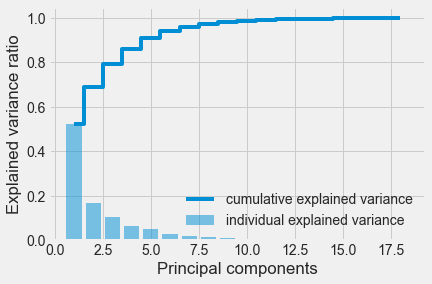

In [224]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### From above we plot we can clealry observer that 8 Principle components are able to explain 95 %variance of data. So we will use only these

In [225]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space
X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

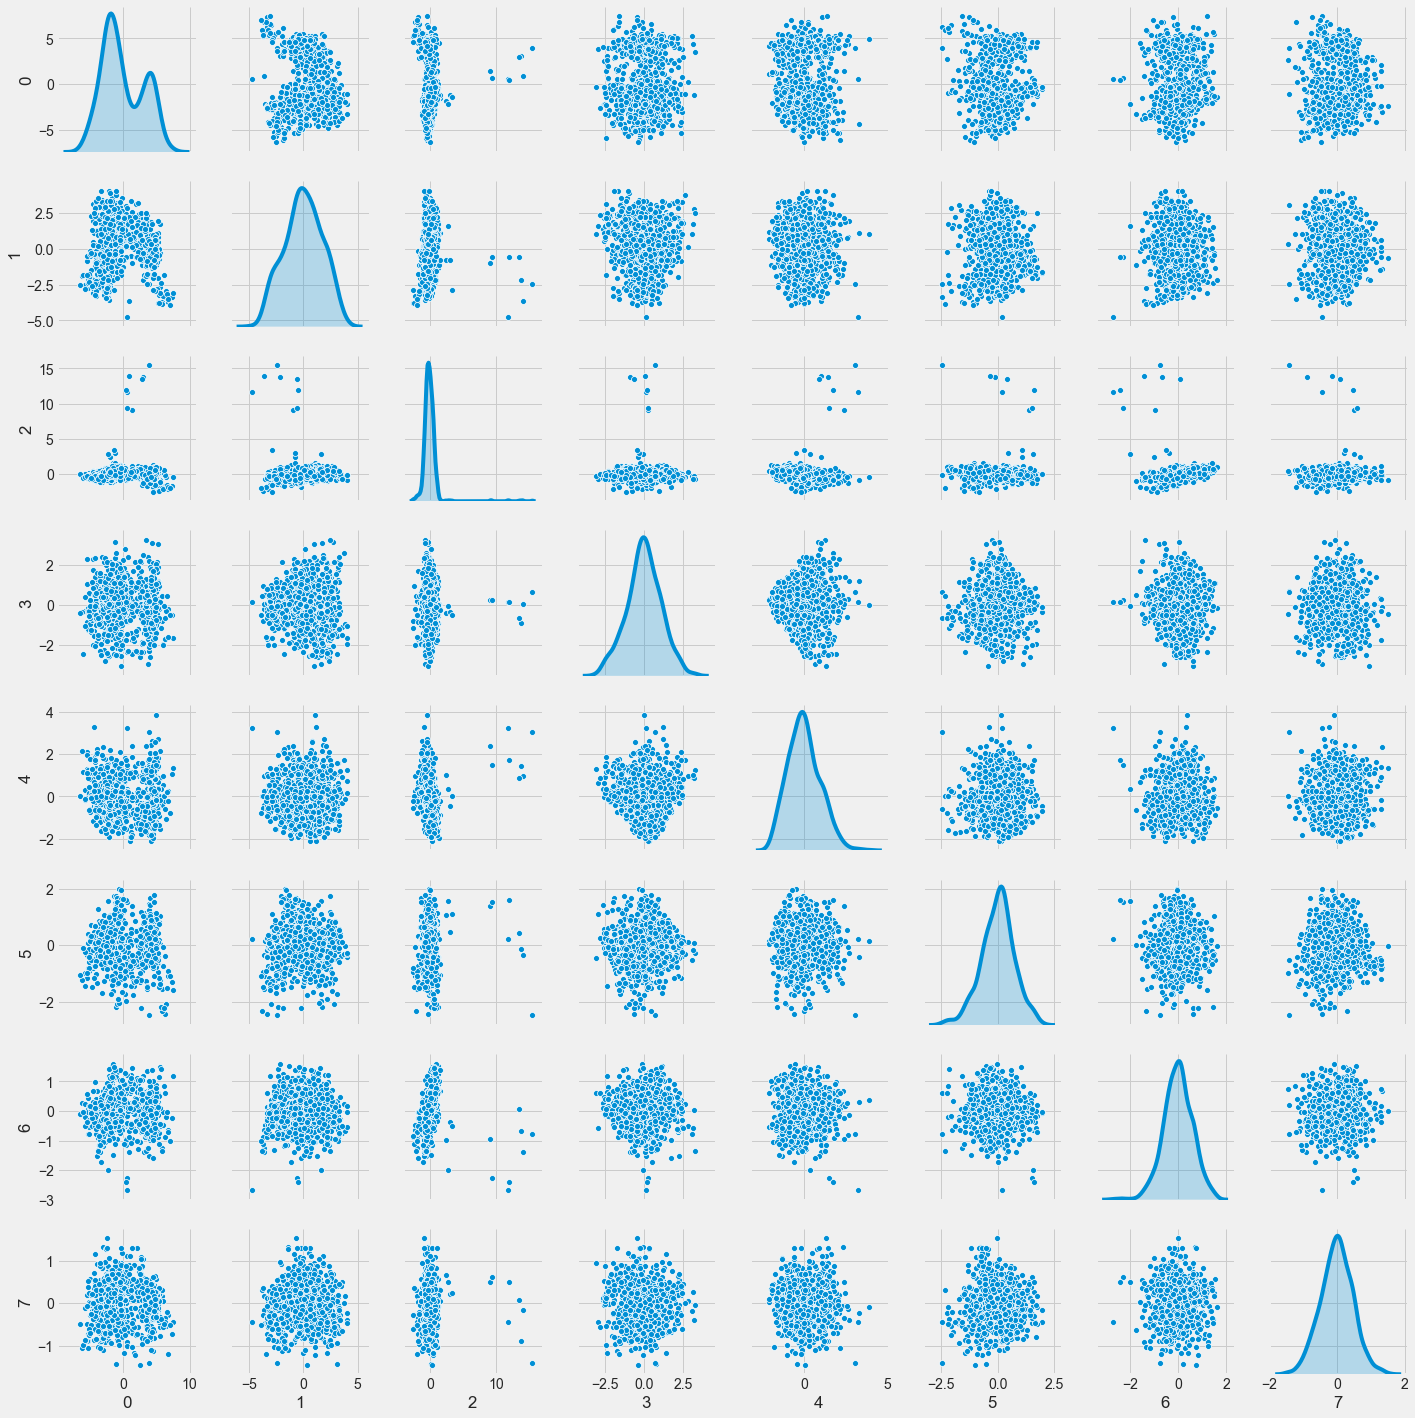

In [226]:
sns.pairplot(reduced_pca, diag_kind='kde') 

### After PCA, all attributes seem independent with no linear relationship

## 3) Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [227]:
#now split the data into 70:30 ratio
#orginal Data
X_train, X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)
#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)


## 4. Train a Support vector machine using the train set and get the accuracy on the test set 

In [228]:
svc = SVC() #instantiate the object
#fit the model on orighinal raw data
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [229]:
#predict the y value
y_predict = svc.predict(X_test)

In [230]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)
#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)
## 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks)

In [231]:
#display accuracy score of both models
print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))


Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.9330708661417323
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.9330708661417323


Confusion Matrix For : 
 Original Data Set
 [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


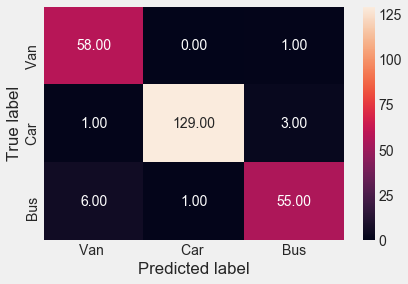

Confusion Matrix For : 
 For Reduced Dimensions Using PCA 
 [[ 57   2   0]
 [  2 126   5]
 [  1   7  54]]


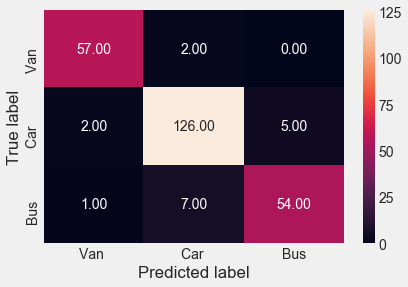

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        59
         1.0       0.93      0.95      0.94       133
         2.0       0.92      0.87      0.89        62

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [232]:
# Calculate Confusion Matrix & PLot To Visualize it
def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evaluate
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For : \n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set\n" )
draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA \n")
#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))
#Classification Report Of Model built on Principal Components:
print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

### Observations: Doing PCA reduces accuracy by only 2%, So PCA is effective given we reduced about 10 attributes

## On Original Data, Analysis from Classification report

### our model has 99 % precison  score when it comes to classify car from the given set of silhoutte parameters. It has 89 % precision when it comes to classifying the input as van, while it has 93 % precision when it come to predict data as bus.
### - In terms of recall score our model has recall score of 98 % for van classification, 97 % for car and 89 % for bus. 
###  - Our model has an weighted average of 95 % for all classification metrics.

## On Reduced Dimensions After PCA, Analysis from Classification report

### 1) Our model has highest precision score of 95 % when it comes to predict van type, which is better as compared to prediction done on original data set, which came out with the precision score of 89 % for van. 
### 2) Recall score is similar to  original data set. It showed highest recall score of 97 % in classifying data as car.

##   *********************************************************************************************************************
## Lets now do Hyperparamter Tuning Using GridSearchCV & Cross-Validation:

In [165]:
import itertools
def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)

In [166]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()
#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())
# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]
param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


SVM Parameters: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Iteration 1:In Case Of PCA

## 5. Perform K-fold cross validation and get the cross validation score of the model 

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.3s finished
e:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Score:  0.9256756756756757
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.97      0.94      0.96       125
         2.0       0.92      0.97      0.94        58

   micro avg       0.95      0.95      0.95       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.95      0.95      0.95       254

Confusion Matrix For : 
 Original Data Set [[ 68   3   0]
 [  2 118   5]
 [  1   1  56]]


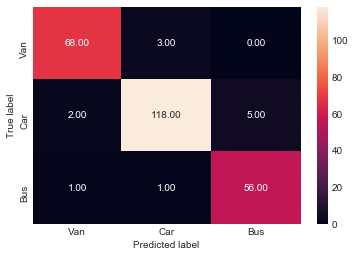

SVM Accuracy Score: 95.0


In [68]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

### GridSearchCV get’s the best parameter from the array of parameters and find the best model and score for us

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


Best Score:  0.956081081081081
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.98      0.94      0.96       125
         2.0       0.88      0.98      0.93        58

   micro avg       0.96      0.96      0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

Confusion Matrix For : 
 Original Data Set [[ 68   1   2]
 [  1 118   6]
 [  0   1  57]]


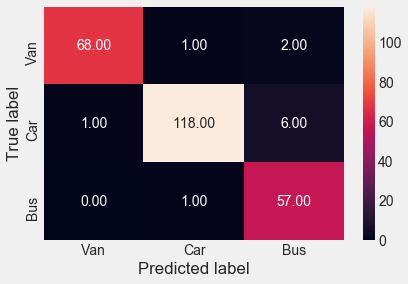

SVM Accuracy Score: 96.0


In [168]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

### Accurracy has improved

### Let’s further tweak the parameters to see if we can improve our model accuracy

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.9358108108108109
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier_iterarion2 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        71
         1.0       0.94      0.94      0.94       125
         2.0       0.90      0.95      0.92        58

   micro avg       0.94      0.94      0.94       254
   macro avg       0.93      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254

Confusion Matrix For : 
 Original Data Set [[ 66   4   1]
 [  3 117   5]
 [  0   3  55]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.9s finished


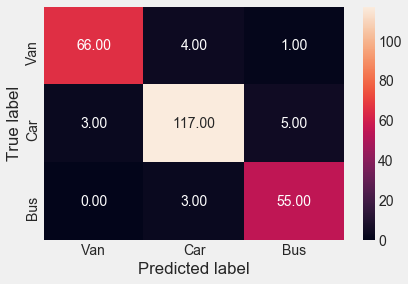

SVM Accuracy Score: 94.0


In [170]:
classifiers_hypertune("Support Vector Classifier_iterarion2", svmc, param_grid_1,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.9679054054054054
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       1.00      0.95      0.98       125
         2.0       0.94      1.00      0.97        58

   micro avg       0.97      0.97      0.97       254
   macro avg       0.96      0.98      0.97       254
weighted avg       0.97      0.97      0.97       254

Confusion Matrix For : 
 Original Data Set [[ 70   0   1]
 [  3 119   3]
 [  0   0  58]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


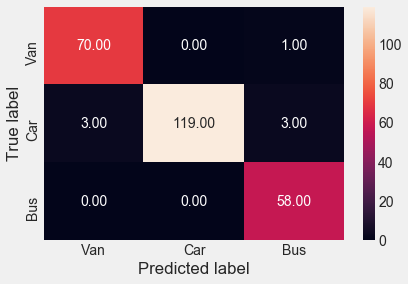

SVM Accuracy Score: 97.0


In [171]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid_1,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

### Accuracy has again improved

# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

## Conclusion: As can be seen PCA helps pick relevant features and improves spped of implementation. Fine Tuning makes it Production ready

### Comparing Other classification Models

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', model.score(ssx_test_sd, SplitScale_y_test))
model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', model.score(X_test_std_pca, SplitScale_y_test))


Before PCA score 0.9330708661417323
After PCA score 0.8346456692913385


e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', nb.score(ssx_test_sd, SplitScale_y_test))
nb.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', nb.score(X_test_std_pca, SplitScale_y_test))

Before PCA score 0.5984251968503937
After PCA score 0.8110236220472441


In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', dt_model.score(ssx_test_sd, SplitScale_y_test))
dt_model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', dt_model.score(X_test_std_pca, SplitScale_y_test))

Before PCA score 0.8740157480314961
After PCA score 0.7992125984251969


## Best Model seems to be SVM followed by Decision Tree. We could test using other algorithms to see performance and select the right algorithm